## 1 - Import the libraries

In [1]:
#1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

## 2 and 3 - Load and explore the dataset

In [2]:
df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv') 
print(df.shape)
print(df.head())
print(df.info())

(9134, 24)
  Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income  ...  \
0           2/24/11         Employed      F   56274  ...   
1           1/31/11       Unemployed      F       0  ...   
2           2/19/11         Employed      F   48767  ...   
3           1/20/11       Unemployed      M       0  ...   
4            2/3/11         Employed      M   43836  ...   

  Months Since Policy Inception Number of Open Complaints  Number of Policies  \
0                             5                         0         

In [3]:
df.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [4]:
df = pd.DataFrame(df)
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


## 4 - Rename the columns of the dataset

In [5]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


## 5 - Converting to datetime format

In [6]:
df["effective_to_date"] = pd.to_datetime(df["effective_to_date"])
df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


## 6 - Create a numerical dataset

In [7]:
numericals = df.select_dtypes(include = np.number)
numericals

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


## 7 - Separate discrete and continuous variables

In [8]:
numericals.nunique()

customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64

In [9]:
def differentiate_numerical(df, threshold=50):
    continuous_v = []
    discrete_v = []
    
    for column in df.columns:
        unique_values = df[column].nunique()
        if unique_values > threshold:
            continuous_v.append(column)
        else:
            discrete_v.append(column)
            
    return continuous_v, discrete_v

In [10]:
continuous_v, discrete_v = differentiate_numerical(numericals)

In [11]:
continuous_v

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_policy_inception',
 'total_claim_amount']

In [12]:
discrete_v

['months_since_last_claim', 'number_of_open_complaints', 'number_of_policies']

## 8 - Plotting a correlation matrix

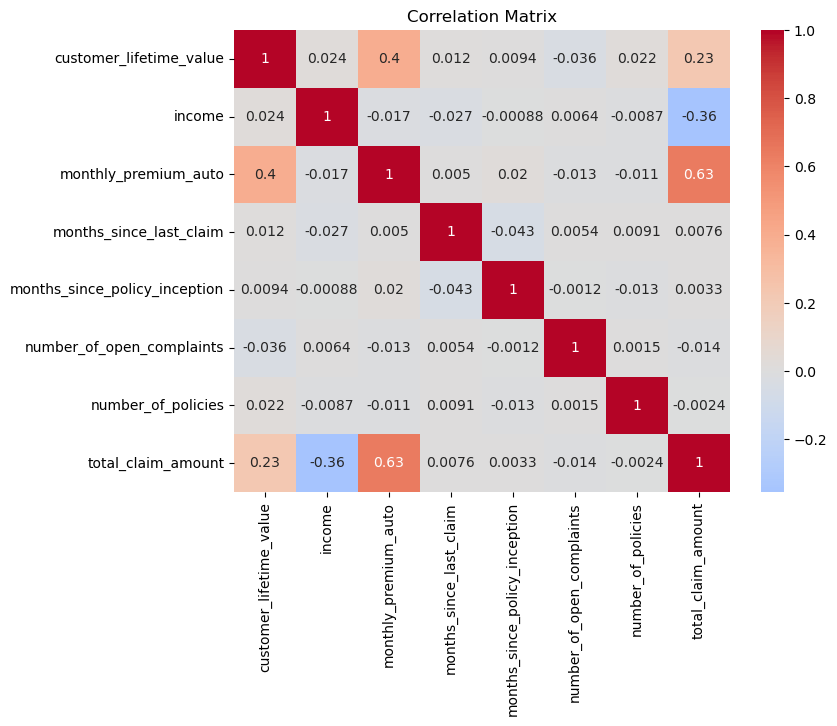

In [13]:
correlation_matrix = numericals.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()



## Comments

###From this, I can see that total_claim_amount and monthly_premium_auto are highly correlated.

In [14]:
## 9 - Plotting discrete and continuous variables

In [15]:
def plot_discrete_variables(dataframe, variables):
    for var in variables:
        plt.figure(figsize=(10, 3))
        sns.countplot(data=dataframe, x=var)
        plt.title(f'Distribution of {var}')
        plt.show()

def plot_continuous_variables(dataframe, variables):
    for var in variables:
        plt.figure(figsize=(10, 3))
        sns.histplot(data=dataframe, x=var, kde=True, bins=50)
        plt.title(f'Distribution of {var}')
        plt.show()

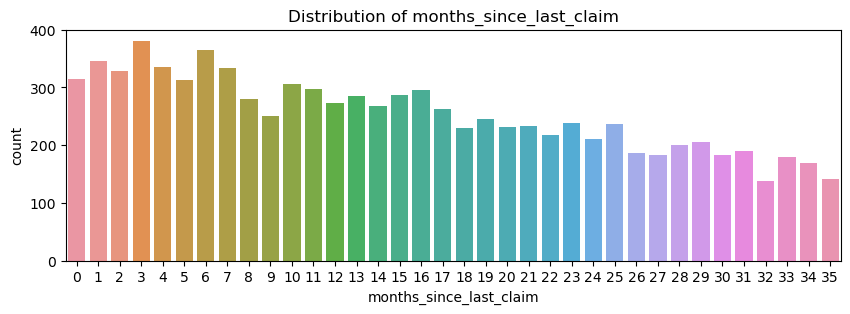

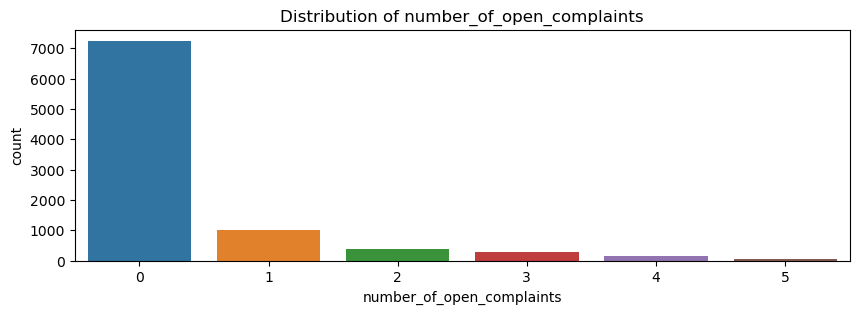

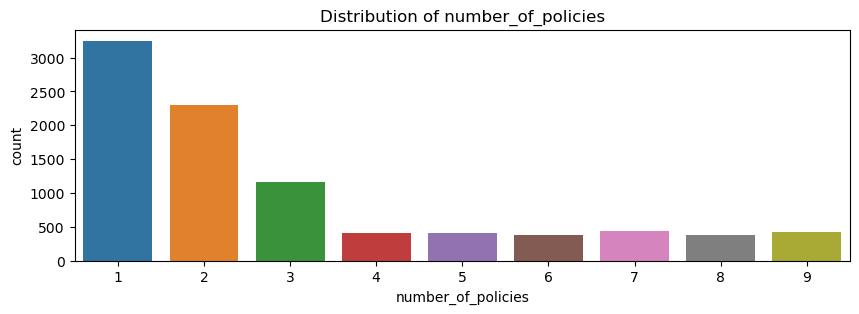

In [16]:
plot_discrete_variables(numericals, discrete_v)

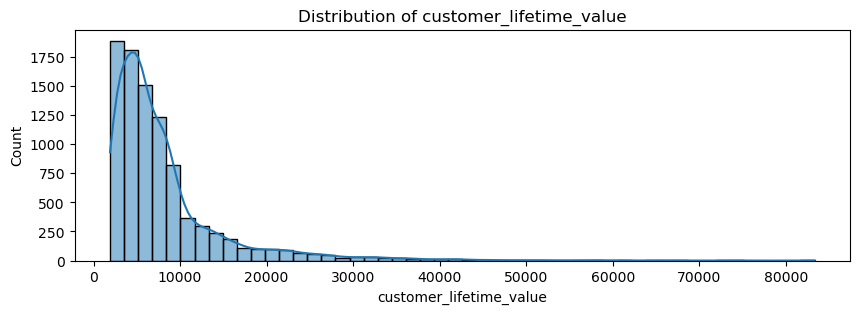

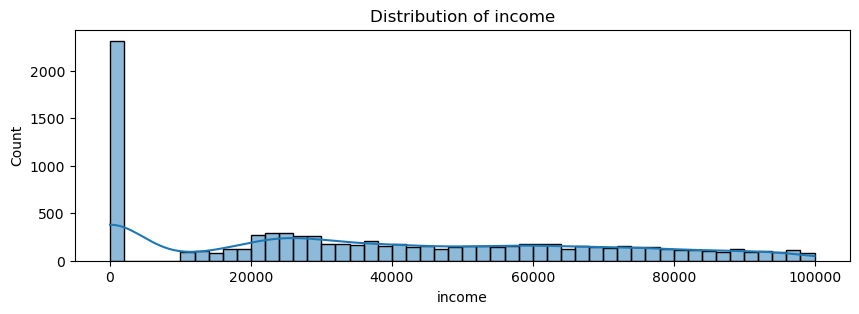

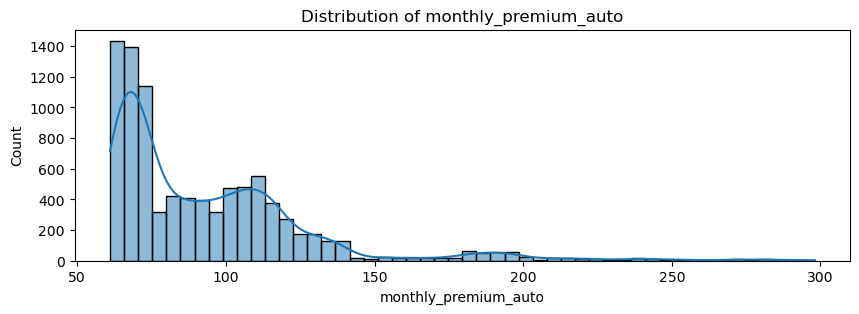

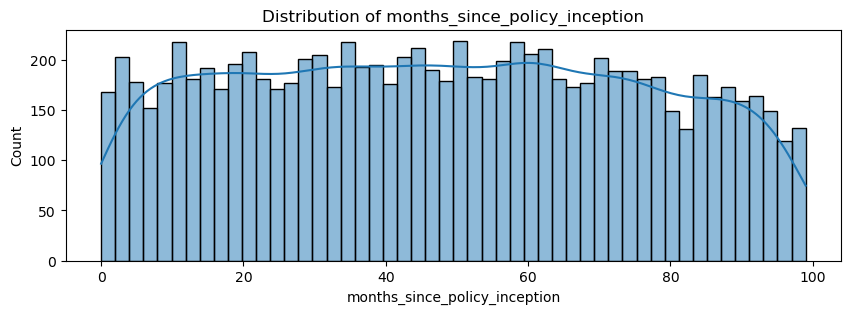

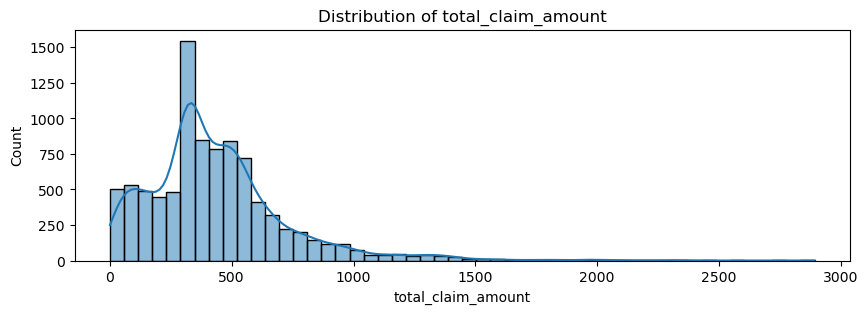

In [17]:
plot_continuous_variables(numericals, continuous_v)

## 10 - Comments

Income: we have 2317 values with 0, which could represente missing data. 
Customer Lifetime Value: the plot has a long tail to the right, due to some outliers.
Total_claim_amount: also has a long tail to the right, due to its outliers as well.


In [18]:
value_counts = df['income'].value_counts()
# Access the count of 0 values
count_of_zeros = value_counts.get(0, 0)

print(f"Count of 0 values: {count_of_zeros}")

Count of 0 values: 2317


## 11 - Outliers in continuous variables

In [19]:
continuous_v

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_policy_inception',
 'total_claim_amount']

In [20]:
def plot_outliers(dataframe, variables):
    for var in variables:
        plt.figure(figsize=(20, 5))
        sns.boxplot(data=dataframe, x=var)
        plt.title(f'Boxplot of {var}')
        plt.show()

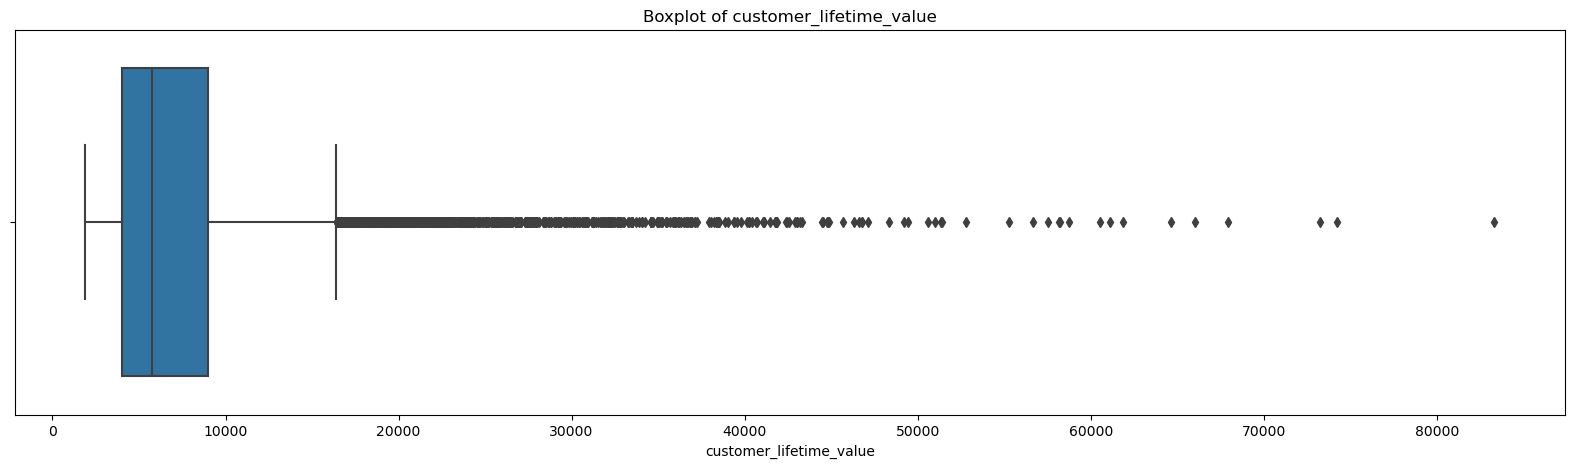

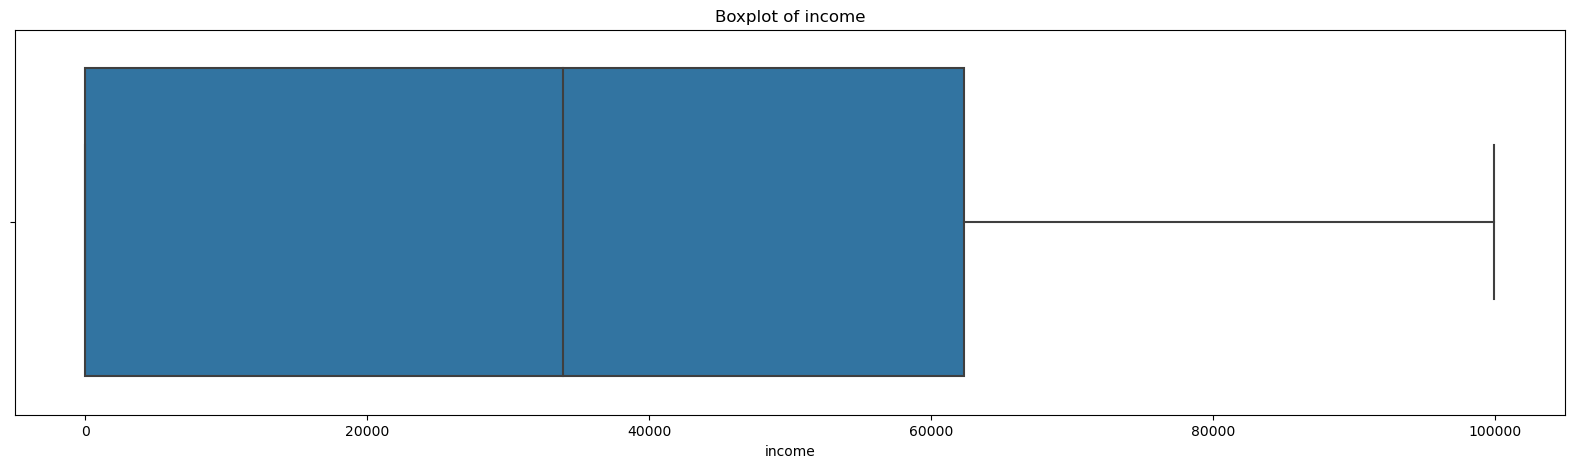

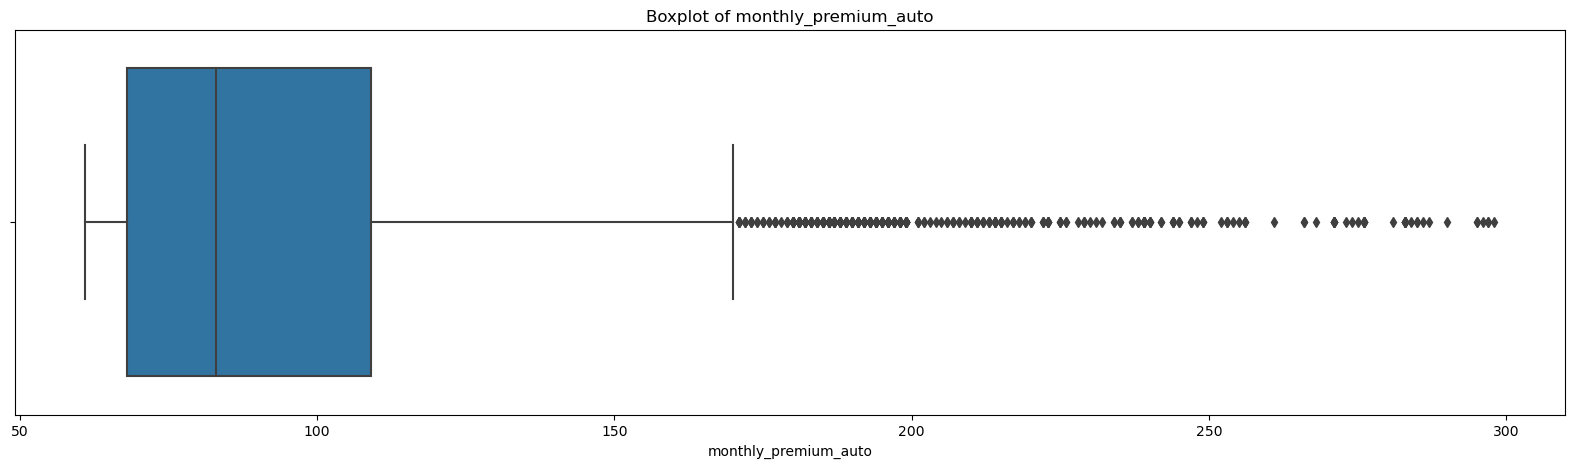

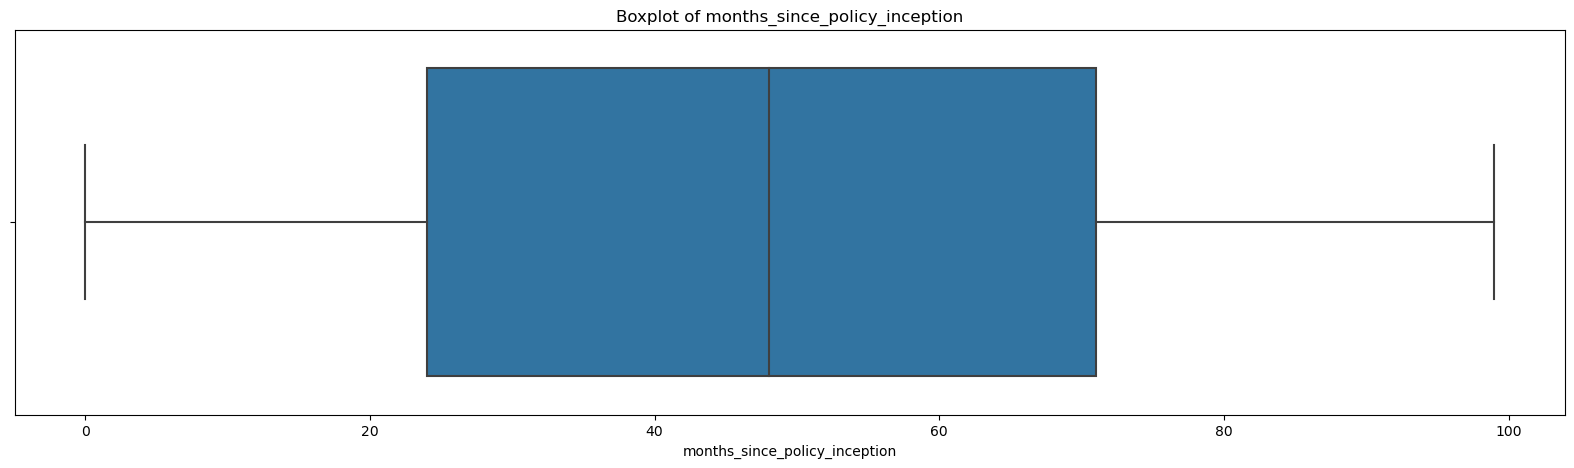

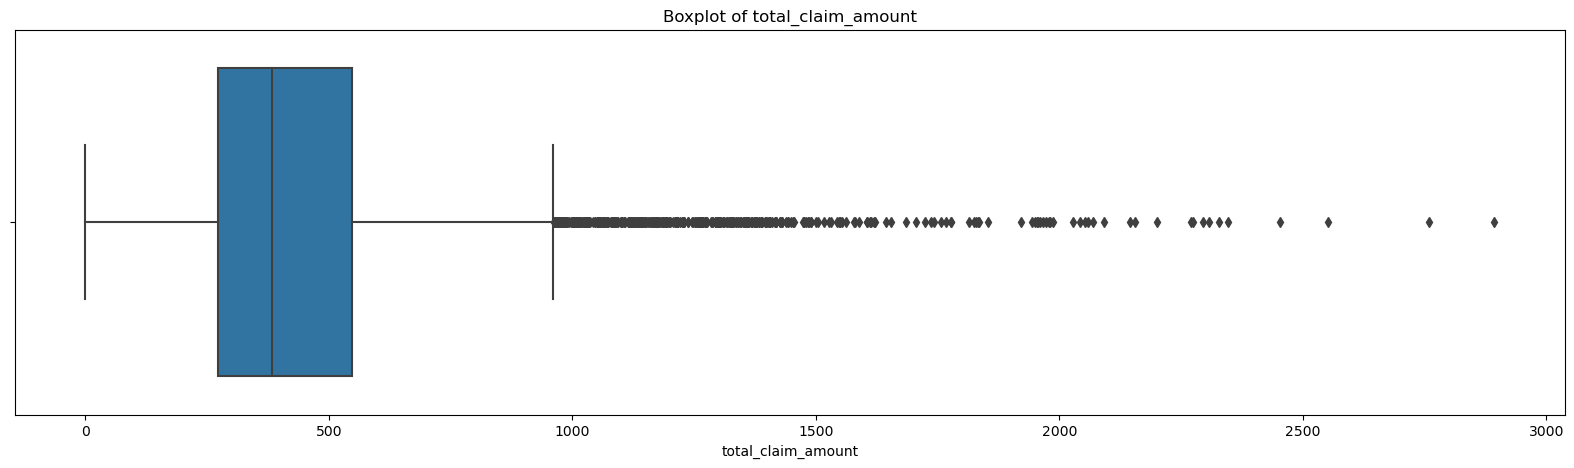

In [21]:
plot_outliers(numericals, continuous_v)

# 12 - Working with and deciding what to do with outliers

In [28]:
def remove_outliers(dataframe, variables):
    df = dataframe.copy()
    for var in variables:
        Q1 = df[var].quantile(0.25)
        Q3 = df[var].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df = df[(df[var] >= lower_bound) & (df[var] <= upper_bound)]
    return df

In [29]:
variables_with_outliers = ['customer_lifetime_value', 'monthly_premium_auto', 'total_claim_amount']

In [30]:
cleaned_numerical_df = remove_outliers(numericals, variables_with_outliers)

In [31]:
numericals.shape

(9134, 8)

In [32]:
cleaned_numerical_df.shape

(7789, 8)

In [38]:
9134-7789

1345

## Comments:

The cleaned_numerical_df has 1345 rows less than the original dataset, so removing these rows would negatively impact the analysis.
Furthermore, outliers sometimes have great insights; for example, the greatest value for the outlier of customer_lifetime_value could be a beneficial insight for the donations campaign.

###Transformation: Instead of removing outliers, we can apply log-transform, to minimixe extreme outliers.

In [57]:
def log_transform(dataframe, variables):
    df = dataframe.copy()
    for var in variables:
        df[var] = np.log(df[var] + 1)
    return df

In [59]:
log_trans = log_transform(numericals, variables_with_outliers)
log_trans

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,7.924622,56274,4.248495,32,5,0,1,5.955348
1,8.850881,0,4.553877,13,42,0,8,7.032152
2,9.464085,48767,4.691348,18,38,0,2,6.341192
3,8.942051,0,4.672829,18,65,0,7,6.274539
4,7.942608,43836,4.304065,12,44,0,1,4.935415
...,...,...,...,...,...,...,...,...
9129,10.060790,71941,4.304065,18,89,0,2,5.294484
9130,8.038354,21604,4.382027,14,28,0,1,5.940697
9131,9.007599,0,4.454347,9,37,3,2,6.674290
9132,8.926045,21941,4.574711,34,3,0,3,6.539875


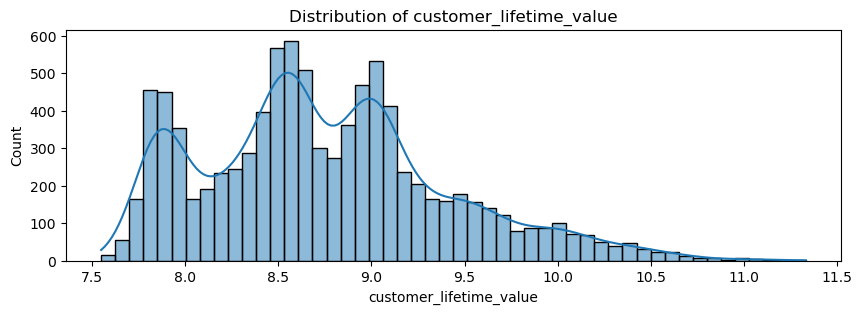

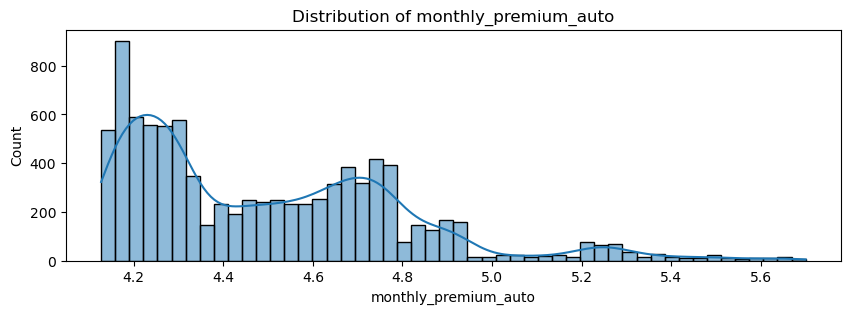

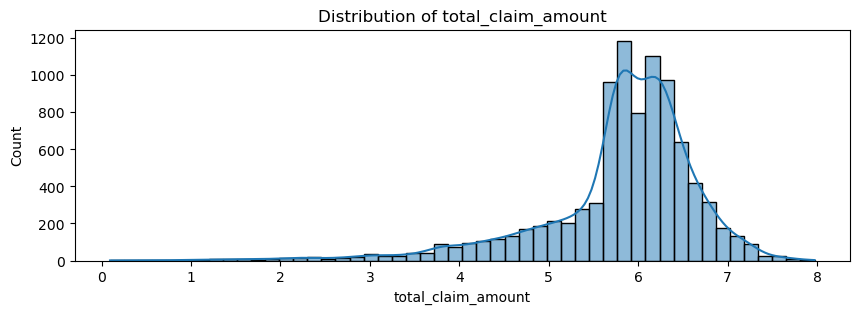

In [60]:
plot_continuous_variables(log_trans, variables_with_outliers)

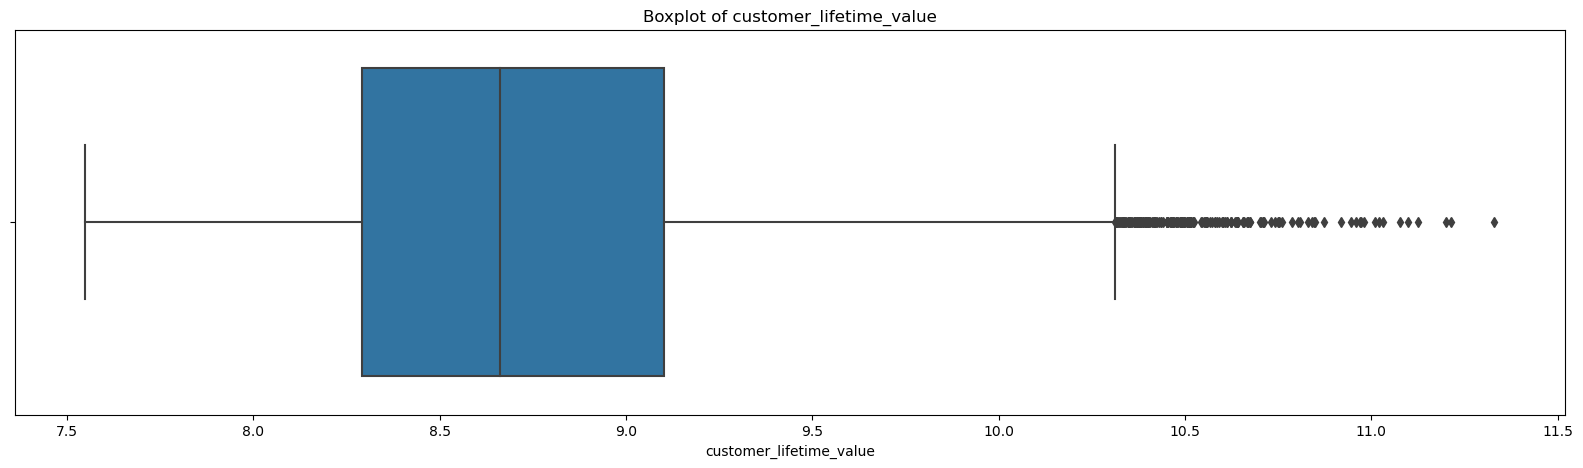

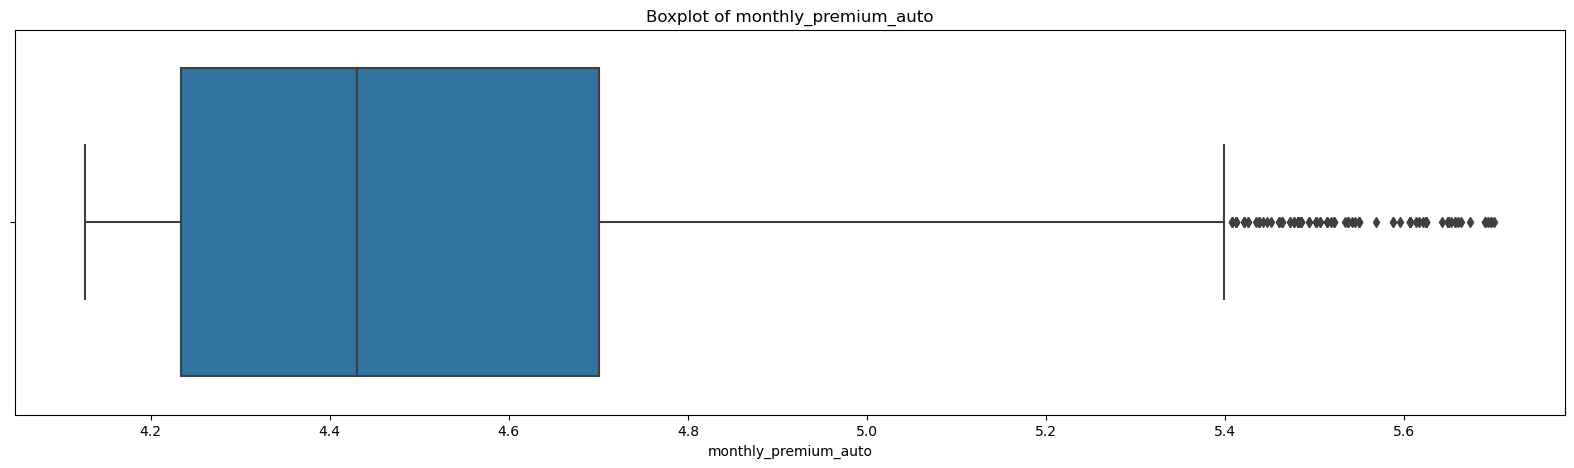

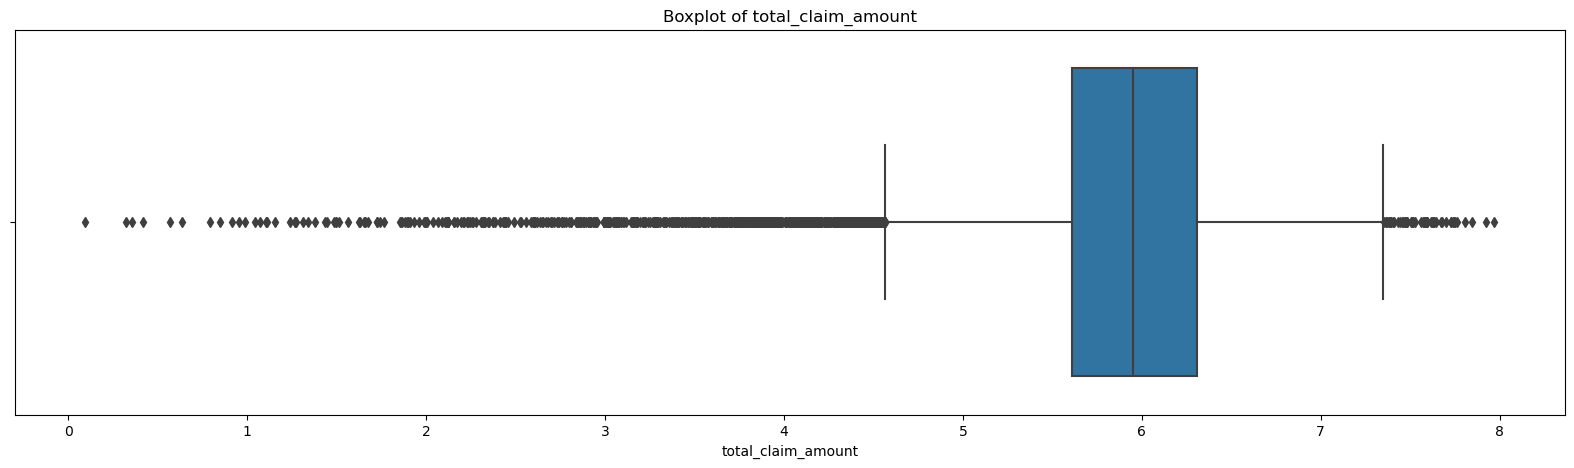

In [61]:
plot_outliers(log_trans, variables_with_outliers)

In [63]:
df = log_trans
df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,7.924622,56274,4.248495,32,5,0,1,5.955348
1,8.850881,0,4.553877,13,42,0,8,7.032152
2,9.464085,48767,4.691348,18,38,0,2,6.341192
3,8.942051,0,4.672829,18,65,0,7,6.274539
4,7.942608,43836,4.304065,12,44,0,1,4.935415
...,...,...,...,...,...,...,...,...
9129,10.060790,71941,4.304065,18,89,0,2,5.294484
9130,8.038354,21604,4.382027,14,28,0,1,5.940697
9131,9.007599,0,4.454347,9,37,3,2,6.674290
9132,8.926045,21941,4.574711,34,3,0,3,6.539875


## 13 - Checking for NaNs

In [64]:
df.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

### No NaNs in the dataset

# 14 - Saving the clean df

In [65]:
df.to_csv('numerical.csv', index=False)
df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,7.924622,56274,4.248495,32,5,0,1,5.955348
1,8.850881,0,4.553877,13,42,0,8,7.032152
2,9.464085,48767,4.691348,18,38,0,2,6.341192
3,8.942051,0,4.672829,18,65,0,7,6.274539
4,7.942608,43836,4.304065,12,44,0,1,4.935415
...,...,...,...,...,...,...,...,...
9129,10.060790,71941,4.304065,18,89,0,2,5.294484
9130,8.038354,21604,4.382027,14,28,0,1,5.940697
9131,9.007599,0,4.454347,9,37,3,2,6.674290
9132,8.926045,21941,4.574711,34,3,0,3,6.539875


# Afternoon lab, cleaning categoricals